# Introduction

<p align="justify">Welcome! In this case we'll be exploring how to use advanced analytic and machine learning techniques to predict strokes. 
<br>
<br>
<details>
<summary>Some of the skills you'll explore are (Click to Expand):</summary>
<ul>
    <li>R Programming</li>
    <li>Data Cleaning</li>
    <li>Exploratory Data Analysis</li>
    <li>Data Visualization</li>
    <li>Leveraging Domain Knowledge</li>
    <li>Machine Learning</li>
    <li>Random Forest Algorithm</li>
</details><br>
Don't worry if you're unsure what some of these terms are. They'll be explained throughout the case. Let's begin! 

<img src="https://www.fromthegenesis.com/wp-content/uploads/2018/06/RanFore.jpg" style="float: left; width: 34%; margin-bottom: 0.5em;">
<img src="https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcSxzj-rl3NFqS8Iow-h_3cE2mJoINBs9ZFOjo-tx44d86KiRja7" style="float: left; width: 33%; margin-left: 1%; margin-bottom: 0.5em;">
<img src="https://www.edvancer.in/wp-content/uploads/2015/10/f5bd5f87059fce20564f6e5eb562022e.png" style="float: left; width: 27%; margin-left: 1%; margin-bottom: 0.5em;">

## Case Scenario

Imagine you're an emergency physician at a local community hospital. Your hospital has recently joined a regional initiative to improve quality of care for stroke. After undergoing over a decade of training, you're well-versed in the clinical manifestations of stroke. Still, you know there is great uncertainty in diagnosing and treating stroke. The window for treatment is narrow and the drugs involved can have dangerous side-effects. Can analytics and machine learning help with this uncertainty?

Continue the case to find out

### Clinical Background: Stroke

Stroke is an acute neurologic condition referred to as a cerebrovascular event. This means stroke is a condition that affects the brain ("cerebro-") and involves blood vessels ("vascular). In stroke, arteries leading to and within the brain are either blocked by a clot or rupture. The end result is lack of oxygen and nutrients to the brain leading to brain damage. 

<center>
  <img width="500" height=300 src="https://www.strokeinfo.org/wp-content/uploads/2019/06/HTN_16_pg39_art600x400.png">
<\center>

Stroke is usually diagnosed clinically (by symptoms) and imaging (non-contrast head CT scan). Stroke can exhibit a wide range of symptoms depending on the location affected within the brain. Some nonspecific symptoms include headache ("worst headache of my life", nausea, vomiting, loss of consciousness, and neck stiffness. If suspected a non-contrast head CT is ordered to detect bleeding. Depending on whether the stroke is caused by a clot or rupture, treatment will be different. A clot will be treated with blood thinners. A rupture will be treated through emergent neurosurgery. 

> Stroke require prompt diagnosis and treatment before irreversible damages sets in. Any tool (such as a predictive model) that could make stroke diagnosis quicker or easier could make a large difference in preventing stroke. 

## Using Jupyter Notebook 

To run any of the code, select the code cell on the **bottom right (1.2)**, and click the `Run` button on the toolbar above. Try it out on the example code cell below on the **bottom right (1.2)**.

**The** `Run` **Button**
<img src="https://i.imgur.com/jr4dpLW.png" style="width:300px;height:150px;">

In [1]:
# This is an example of a code cell
cat('Congratulations! \n')
cat('You\'ve run your first code cell.\n')


Congratulations! 
You've run your first code cell.


### Jupyter Notebook Background

What is a Jupyter Notebook? Why is it so special? Below is a definition of Jupyter Notebook from the creators. 

> "The Jupyter Notebook is an open-source web application that allows you to create and share documents that contain live code, equations, visualizations and narrative text. Uses include: data cleaning and transformation, numerical simulation, statistical modeling, data visualization, machine learning, and much more." - [jupyter.org](https://www.jupyter.org)

Through integrating code, text, and multimedia, jupyter notebooks allow us to create a digital notebook that is both **interactive** and **informative**. Don't just take my word for it though, personally explore how Jupyter Notebook can augment your learning through the case!

<img src="https://www.dataquest.io/wp-content/uploads/2019/01/1-LPnY8nOLg4S6_TG0DEXwsg-1.png" style="width:600px;height:300px;">


### Case Code Tips

Within code cells you will see green text preceded by a `#` symbol. These are comments and will help explain what portions of the code are doing. All code should be ready to run as shown. 

Some code may require more time to run. On the left hand side you will notice the label: `In [ ]:`. If there is an `*` in between the `[]`'s after you select `Run`, that indicates that your code is in the process of running. Like so: `In [*]:`

## Meeting Our Data

We'll be using a deidentified set of patient data made available on [kaggle](https://www.kaggle.com/asaumya/healthcare-dataset-stroke-data/version/1), a data science community website. The data was originally provided by Mckinsey Analytics for a online hackathon hosted by Analytics Vidhya.  


### Data File

<p style="text-align: center;">stroke_predict.csv</p>

***
This file contains our dataset. There are a little over 43,000 patients with 12 variables. The data includes general demographic and clinical variables. 

The dataset will already be downloaded for the case. The The original data can be acceded [here](https://www.kaggle.com/asaumya/healthcare-dataset-stroke-data/version/1). 

### Consulting the Data Dictionary

There are several variables or labels which you might not understand. There are many reasons for this. You might lack domain experience for the data you're analyzing. The data creators might also have used arbitrary labels only they understood (this is considered a bad practice).

The way to combat this is by consulting the data dictionary or documentation. These are tables or documents which describe the data in detail. Have a variable you don't understand? Check the documentation! Don't understand what an output for a variable means? Check the documentation!

A data dictionary is provided on the [kaggle page](https://www.kaggle.com/asaumya/healthcare-dataset-stroke-data/version/1#Screen%20Shot%202018-04-17%20at%2012.15.42%20AM.png) where the data is hosted. The data dictionary has also been reproduced below for your convenience.  

<center>

| *Variable*        | *Definition*                                           |
| ----------------- | ------------------------------------------------------ |
| id                | Patient ID                                             |
| gender            | Gender of Patient                                      |
| age               | Age of Patient                                         | 
| hypertension      | 0 - no hypertension, 1 - suffering from hypertension   |
| heart_disease     | 0 - no heart disease, 1 - suffering from heart disease |
| ever_married      | Yes/No                                                 |
| work_type         | Type of occupation                                     |
| Residence_type    | Area type of residence (Urban/ Rural                   |
| avg_glucose_level | Average Glucose level (measured after meal)            |
| bmi               | Body mass index                                        |
| smoking_status    | patient's smoking status                               |
| stroke            | patient's smoking status                               |

</center>

# Setup (Do Not Skip)

Run the code below to set up specific settings for our case. Do not skip this step!

In [2]:
# Increase max number of columns displayed in output tables
options(repr.matrix.max.cols = 2000)
set.seed(10) # Make sure your ML results are the same
# Calling external libraries for additional functionality
suppressMessages(library(tidyverse))
suppressMessages(library(randomForest))
suppressMessages(library(forcats))
suppressMessages(library(cowplot))
suppressMessages(library(caret))
suppressMessages(library(e1071))
suppressMessages(library(pROC))

cat('Setup complete!')

Setup complete!

# Cleaning Our Data

The first step in any analytic project is to clean our data. This is a critical step that is commonly overlooked within data science projects. This is critical for making our data convenient to interpret and manipulate. In addition, many analytic techniques require properly formatted data. Finally, healthcare datasets may have have data that isn't clinically relevant (ie. raw lab values). Processing can convert these variables into clinically meaningful information. It won't matter how sophisticated our analysis is if we don't properly process our data. A common saying in data science is "Junk in, Junk out". 

## Reading Our data

We'll begin by reading in our data so we can clean and use it. 

In [3]:
# Note: Unicode Transformation Format – 8 (UTF-8) is a standard to encode characters in different languages
cat('Data loading, please wait\n')
stroke_data <- read.csv(file="data/stroke_predict.csv",  encoding="UTF-8", header=TRUE, sep=",")
cat('Data loaded!')

Data loading, please wait
Data loaded!

Now let's get an overview of our data

In [4]:
head(stroke_data)
str(stroke_data)

id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
30669,Male,3,0,0,No,children,Rural,95.12,18.0,,0
30468,Male,58,1,0,Yes,Private,Urban,87.96,39.2,never smoked,0
16523,Female,8,0,0,No,Private,Urban,110.89,17.6,,0
56543,Female,70,0,0,Yes,Private,Rural,69.04,35.9,formerly smoked,0
46136,Male,14,0,0,No,Never_worked,Rural,161.28,19.1,,0
32257,Female,47,0,0,Yes,Private,Urban,210.95,50.1,,0


'data.frame':	43400 obs. of  12 variables:
 $ id               : int  30669 30468 16523 56543 46136 32257 52800 41413 15266 28674 ...
 $ gender           : Factor w/ 3 levels "Female","Male",..: 2 2 1 1 2 1 1 1 1 1 ...
 $ age              : num  3 58 8 70 14 47 52 75 32 74 ...
 $ hypertension     : int  0 1 0 0 0 0 0 0 0 1 ...
 $ heart_disease    : int  0 0 0 0 0 0 0 1 0 0 ...
 $ ever_married     : Factor w/ 2 levels "No","Yes": 1 2 1 2 1 2 2 2 2 2 ...
 $ work_type        : Factor w/ 5 levels "children","Govt_job",..: 1 4 4 4 3 4 4 5 4 5 ...
 $ Residence_type   : Factor w/ 2 levels "Rural","Urban": 1 2 2 1 1 2 2 1 1 2 ...
 $ avg_glucose_level: num  95.1 88 110.9 69 161.3 ...
 $ bmi              : num  18 39.2 17.6 35.9 19.1 50.1 17.7 27 32.3 54.6 ...
 $ smoking_status   : Factor w/ 4 levels "","formerly smoked",..: 1 3 1 2 1 1 2 3 4 3 ...
 $ stroke           : int  0 0 0 0 0 0 0 0 0 0 ...


We can see that many variables have not been coded into an easily human-readable format (ie. `hypertension`, `heart_disease`, `stroke`). We will also need to convert some of the clinical variables into meaningful categories (`avg_glucose_level` and `bmi`). 

## Recoding Variables

Our first task will be recoding the variables `hypertension` (high blood pressure), `heart_disease`, and `stroke` into something meaningful. Based upon the data dictionary, we can see that a value of `1` for any of these fields indicates the patient is suffering from this condition. A value of `0` indicates they are not. 

In [5]:
# Recoding
stroke_data$hypertension[stroke_data$hypertension == 1] <- 'History of hypertension'
stroke_data$hypertension[stroke_data$hypertension == 0] <- 'No hypertension'
stroke_data$heart_disease[stroke_data$heart_disease == 1] <- 'History of heart disease'
stroke_data$heart_disease[stroke_data$heart_disease == 0] <- 'No heart disease'
stroke_data$stroke[stroke_data$stroke == 1] <- 'History of stroke'
stroke_data$stroke[stroke_data$stroke == 0] <- 'No stroke'
cat('Data Recoded')

Data Recoded

Lets confirm our changes

In [6]:
head(stroke_data[c('hypertension', 'heart_disease', 'stroke')])
str(stroke_data[c('hypertension', 'heart_disease', 'stroke')])

hypertension,heart_disease,stroke
No hypertension,No heart disease,No stroke
History of hypertension,No heart disease,No stroke
No hypertension,No heart disease,No stroke
No hypertension,No heart disease,No stroke
No hypertension,No heart disease,No stroke
No hypertension,No heart disease,No stroke


'data.frame':	43400 obs. of  3 variables:
 $ hypertension : chr  "No hypertension" "History of hypertension" "No hypertension" "No hypertension" ...
 $ heart_disease: chr  "No heart disease" "No heart disease" "No heart disease" "No heart disease" ...
 $ stroke       : chr  "No stroke" "No stroke" "No stroke" "No stroke" ...


Looks like our changes were successful. In the output, notice the `int`. This is R's way to tell us that R considers these a integer variable. For our purposes, we can consider integers as a subtype of numeric variables. 

We will be converting these into categorical variables since these variables have a limited number of categories

**Pre-Check:** What is the difference between a numeric and categorical variable?

- **Numeric:** variables whose values are whole numbers (ie. numbers, percents)
- **Categorical:** variables whose values are selected from a group (ie. dog breeds, male/female) 

> Note R calls categorical variables **Factors**

In [7]:
stroke_data$hypertension <- as.factor(stroke_data$hypertension)
stroke_data$heart_disease <- as.factor(stroke_data$heart_disease)
stroke_data$stroke <- as.factor(stroke_data$stroke)

cat('Conversion complete!')

Conversion complete!

## Checking for Missing Values

Let examine our data for missing values. 

In [8]:
cat('Number of Missing Data for Each Variable:')
sapply(stroke_data, function(x) sum(is.na(x)))

Number of Missing Data for Each Variable:

id            gender               age      hypertension 
                0                 0                 0                 0 
    heart_disease      ever_married         work_type    Residence_type 
                0                 0                 0                 0 
avg_glucose_level               bmi    smoking_status            stroke 
                0              1462                 0                 0

Besides `bmi` our data looks exceptionally clean. This rarely happens. It is more likely that our data is not coded correctly. Lets examine our data more closely

In [9]:
head(stroke_data)

id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
30669,Male,3,No hypertension,No heart disease,No,children,Rural,95.12,18.0,,No stroke
30468,Male,58,History of hypertension,No heart disease,Yes,Private,Urban,87.96,39.2,never smoked,No stroke
16523,Female,8,No hypertension,No heart disease,No,Private,Urban,110.89,17.6,,No stroke
56543,Female,70,No hypertension,No heart disease,Yes,Private,Rural,69.04,35.9,formerly smoked,No stroke
46136,Male,14,No hypertension,No heart disease,No,Never_worked,Rural,161.28,19.1,,No stroke
32257,Female,47,No hypertension,No heart disease,Yes,Private,Urban,210.95,50.1,,No stroke


We can see that `smoking_status` has numerous blank values. However, none of these are coded as missing (R recognizes miss as `Na` values). Lets take a closer look at `smoking_status`. 

In [10]:
table(stroke_data$smoking_status, exclude = NULL)


                formerly smoked    never smoked          smokes 
          13292            7493           16053            6562 

We can see that approximately 1/4 of `smoking status` values are blank! Lets make sure R can recognize these values as missing now. 

In [11]:
stroke_data[stroke_data == ''] <- NA
table(stroke_data$smoking_status, exclude = NULL)


                formerly smoked    never smoked          smokes            <NA> 
              0            7493           16053            6562           13292 

Much better!

### Checking for Implausible Values

Lets check our data for implausible values. Focus on the minimum and maximum values for the numeric output below

In [12]:
summary(stroke_data)

       id           gender           age                         hypertension  
 Min.   :    1   Female:25665   Min.   : 0.08   History of hypertension: 4061  
 1st Qu.:18039   Male  :17724   1st Qu.:24.00   No hypertension        :39339  
 Median :36352   Other :   11   Median :44.00                                  
 Mean   :36326                  Mean   :42.22                                  
 3rd Qu.:54514                  3rd Qu.:60.00                                  
 Max.   :72943                  Max.   :82.00                                  
                                                                               
                  heart_disease   ever_married         work_type    
 History of heart disease: 2062   No :15462    children     : 6156  
 No heart disease        :41338   Yes:27938    Govt_job     : 5440  
                                               Never_worked :  177  
                                               Private      :24834  
               

Among our variables, we can see that `bmi` has a maximum 97.60. It biologically unlikely for an individual to have a `bmi` of 97.60. Lets take a closer look. 

In [13]:
cat('BMI:')
quantile(stroke_data$bmi, c(0, .01, .05, .10, .25, .50, .75, .90, .95, .99, 1), na.rm = TRUE)

BMI:

0%   1%   5%  10%  25%  50%  75%  90%  95%  99% 100% 
10.1 15.0 17.4 19.4 23.2 27.7 32.9 38.6 42.6 51.8 97.6

We can see that the the max `bmi` is a huge jump even compared to our 99th percentile. However, a `bmi` of 10.1, while underweight, is physiologically possible. Based on our finding, lets reclassify implausible values as `Na`

In [14]:
stroke_data$bmi[stroke_data$bmi > 60] <- NA

cat('Values Reclassified!')

Values Reclassified!

## Creating Clinically Relevant Variables

Our data includes two clinical measures: `avg_glucose_lvl` and `bmi`. As raw values, these variables are not optimal for providing clinical information. Adding context can help with this.

We will be taking these measures and creating clinically meaningful variables. 

### BMI

BMI stands for Body Mass Index. This a measure of body weight based upon a person's weight and height. This measure is commonly used to evaluate whether a person is overweight. Below is the BMI formula. 

\[\large \frac{weight (kg)}{[height (m)]^{2}}\]

We will create a new variable which reflects the clinical cutoffs for bmi. 

**Knowledge Check:** What are the clinical cut-offs for BMI?

<center>

| *Category*     | *BMI Range*     |
| -------------- | --------------- |
| Underweight    | BMI < 18.5      |
| Healthy Weight | 18.5 ≤ BMI < 25 |
| Overweight     | 25 ≤ BMI < 30   |
| Obese          | 30 ≥ BMI        |

</center>

Let create the new variable `bmi_interp` based off these cut-offs 

In [15]:
# Create 'bmi_interp'
stroke_data <- mutate(stroke_data, bmi_interp = ifelse(bmi < 18.5, 'Underweight', 
                                        ifelse(bmi >= 18.5 & bmi < 25, 'Healthy Weight',
                                              ifelse(bmi >= 25 & bmi < 30, 'Overweight',
                                                    ifelse(bmi >= 30, 'Obese', NA)))))

# Convert from character to categorical
# Make sure is ordered
stroke_data$bmi_interp <- factor(stroke_data$bmi_interp, levels = c('Underweight', 'Healthy Weight',
                                                                   'Overweight', 'Obese'), ordered = TRUE)

cat('\'bmi_interp\' variable created!')

'bmi_interp' variable created!

Let's confirm our results

In [16]:
head(stroke_data[c('bmi', 'bmi_interp')])

bmi,bmi_interp
18.0,Underweight
39.2,Obese
17.6,Underweight
35.9,Obese
19.1,Healthy Weight
50.1,Obese


#### Limitations and Considerations when using BMI

BMI is a simple, inexpensive, and common measure for body fat. However, there are several clinical considerations to keep in mind when using this measure. It's critical to keep in mind BMI is only a surrogate measure since it uses weight instead of actual body fat content in its calculations. Below are three examples of factors that can influence BMI:

- Age: older adults usually have more body fat than younger adults for the same BMI
- Gender: women tend to have greater amounts of body fat compared to men for the same BMI
- Muscle mass: muscular individuals or athletes may have higher BMI due to increased muscle mass

[Source](https://www.cdc.gov/obesity/downloads/bmiforpactitioners.pdf)

### Average Glucose Level

The data dictionary defines `avg_glucose_lvl` as the average glucose level measured after meals (glucose is another term for blood sugar levels). Glucose levels are commonly used to assess whether a patient has diabetes. A patient with diabetes will have on-average a higher blood glucose level.

However, `avg_glucose_lvl`, as defined by the data dictionary, is clinically problematic. 

**Food for Thought:** What's wrong with 'avg_glucose_lvl' as a measure of blood glucose levels? What is a better measure of average blood sugar status?

Individual's blood glucose can vary widely day to day. This is especially true after meals when individuals are experiencing a physiological spike in their glucose levels. 

[Here's a news article discussing inter-population variability in glucose measurements](https://www.medicalnewstoday.com/articles/322614.php)

A better measure would be hemoglobin A1C which measures the amount of sugar attached to each red blood cell. This is an indication of the average blood glucose status of a patient over 2 to 3 months. 

<img src="https://www.ekfdiagnostics.com/res/HbA1c-Hemoglobin-banner" style="text-align: center; width: 66%;">

We can't change the measurements used in the data. However, just because the glucose measurement is not ideal doesn't mean we need to disregard it completely. Every bit of data counts in analytics!

A good proxy for `avg_glucose_level` would be the cutoffs determined by the oral glucose tolerance test (OGTT)

**Knowledge Check:** What are the criteria for normal, prediabetic, and diabetic in the OGTT two hours after drinking??

<center>

| *Category*     | *Blood Glucose (mg/dl)*   |
| -------------- | ------------------------- |
| Diabetic       | 200 ≤ Blood Glucose       |
| Prediabetic    | 140 ≤ Blood Glucose < 200 |
| Healthy        |  Blood Glucose < 140      |

</center>

We will now use these criteria to classify a patient's 'avg_glucose_level' as either normal, prediabetic, or diabetic based upon OGTT criteria. 

In [17]:
# Create 'diabetic_interp'
stroke_data <- mutate(stroke_data, 
                      diabetic_interp = ifelse(avg_glucose_level < 140, 'Healthy', 
                          ifelse(avg_glucose_level >= 140 & avg_glucose_level < 200, 'Prediabetic',
                              ifelse(avg_glucose_level >= 200, 'Diabetic', NA))))

# Convert from character to categorical
stroke_data$diabetic_interp <- factor(stroke_data$diabetic_interp, 
                                      levels = c('Healthy', 'Prediabetic', 'Diabetic'),
                                      ordered = TRUE)

cat('\'diabetic_interp\' variable created!')

'diabetic_interp' variable created!

Let's confirm our changes

In [18]:
head(stroke_data[c('avg_glucose_level', 'diabetic_interp')])

avg_glucose_level,diabetic_interp
95.12,Healthy
87.96,Healthy
110.89,Healthy
69.04,Healthy
161.28,Prediabetic
210.95,Diabetic


# Exploratory Data Analysis 

Now that we've cleaned our data we can begin exploring our data. Using this, we can see which features are good candidates for building our prediction model. Feature selection  will determine how good or how bad your model is. Bad feature selection can have a hugely negative impact on your model even if you used the most advanced techniques. Understanding the clinical nuances of your data can inform better feature selection

### Why Can't We Just Use All or Most Variables?

One issue you might be wondering about is why do we even need to select variables. Why not just use all of the variables? After all, more data lead to better models right? This is a common misconception that even experienced analysts need to watch out for. Including too many features in your prediction model can lead to what is known as **overfitting**.

<img src="https://3gp10c1vpy442j63me73gy3s-wpengine.netdna-ssl.com/wp-content/uploads/2018/03/Screen-Shot-2018-03-22-at-11.22.15-AM-e1527613915658.png" align="center" style="width: 50%; margin-bottom: 0.5em; margin-top: 0.5em;">

 **Overfitting** is essentially where you build a model that adheres too closely to your current data set and is unable to predict observations that are not from your current data set. In other words, its where you develop a model that tuned too closely to your current data, and is not generalizable to outside data sources. A prediction model that is not generalizeable is not a useful model!

## Getting A Closer Look At Our Data

Lets take a closer look as we begin our exploratory data analysis. 

In [19]:
str(stroke_data)

'data.frame':	43400 obs. of  14 variables:
 $ id               : int  30669 30468 16523 56543 46136 32257 52800 41413 15266 28674 ...
 $ gender           : Factor w/ 3 levels "Female","Male",..: 2 2 1 1 2 1 1 1 1 1 ...
 $ age              : num  3 58 8 70 14 47 52 75 32 74 ...
 $ hypertension     : Factor w/ 2 levels "History of hypertension",..: 2 1 2 2 2 2 2 2 2 1 ...
 $ heart_disease    : Factor w/ 2 levels "History of heart disease",..: 2 2 2 2 2 2 2 1 2 2 ...
 $ ever_married     : Factor w/ 2 levels "No","Yes": 1 2 1 2 1 2 2 2 2 2 ...
 $ work_type        : Factor w/ 5 levels "children","Govt_job",..: 1 4 4 4 3 4 4 5 4 5 ...
 $ Residence_type   : Factor w/ 2 levels "Rural","Urban": 1 2 2 1 1 2 2 1 1 2 ...
 $ avg_glucose_level: num  95.1 88 110.9 69 161.3 ...
 $ bmi              : num  18 39.2 17.6 35.9 19.1 50.1 17.7 27 32.3 54.6 ...
 $ smoking_status   : Factor w/ 4 levels "","formerly smoked",..: NA 3 NA 2 NA NA 2 3 4 3 ...
 $ stroke           : Factor w/ 2 levels "History of str

In [20]:
summary(stroke_data[,-1])

    gender           age                         hypertension  
 Female:25665   Min.   : 0.08   History of hypertension: 4061  
 Male  :17724   1st Qu.:24.00   No hypertension        :39339  
 Other :   11   Median :44.00                                  
                Mean   :42.22                                  
                3rd Qu.:60.00                                  
                Max.   :82.00                                  
                                                               
                  heart_disease   ever_married         work_type    
 History of heart disease: 2062   No :15462    children     : 6156  
 No heart disease        :41338   Yes:27938    Govt_job     : 5440  
                                               Never_worked :  177  
                                               Private      :24834  
                                               Self-employed: 6793  
                                                                    
     

This summary page presents us with quite a bit of data. The first thing to realize is that the output will differ based on whether the variable is numeric or categorical. Numeric outputs will include summary statistics while categorical variables will include frequency counts of each category. 

These summaries will provide a useful reference throughout our exploratory data analysis. 

## Assessing Missing Values

The first indicator of whether a variable would be a good candidate for being a building block of our prediction model is the number of missing values. Among the categorical variables, the only variable with a significant amount of missing data is `smoking_status`.

There are varying interpretations of what constitutes a significant amount of missing data. For our purpose we will consider any variable with >10% of it's values missing as having a significant number of missing observations. 

**Knowledge Check:** Why is using variables with significant amounts of missing data problematic for making predictions?

Missing data can bias the results of our analysis. For instance, say that the individuals that did not respond about smoking status refused to respond because they were embarrassed of their smoking habit. This might make smoking individuals more likely to be smokers compared to individuals that responded to the survey. 

In summary, missing data can be problematic, especially if the missing group is somehow different from the non-missing group. 

The next step will then be to determine whether the data missing is simply the result of random chance or not. If the result is simply due to random chance, this is less problematic since it's less likely to bias our results. However, if missing values don't appear be due to random chance, this could lead to bias in our final analysis leading to a faulty prediction!

When predicting something as serious as stroke, faulty predictions are the last thing we want. 

Lets split our `smoking_status` variable into missing or not missing

In [21]:
# Split Into Null or Not
stroke_data <- mutate(stroke_data, smoke_miss = ifelse(smoking_status == 'NA', 'Missing', 'Not Missing'))
stroke_data$smoke_miss <- invisible(fct_explicit_na(stroke_data$smoke_miss, na_level = 'Missing'))

# Confirm results
table(stroke_data$smoke_miss)


Not Missing     Missing 
      30108       13292 

Now we can test whether the incidence of stroke differs significantly between individuals who responsed about smoking status and those who did not.

In [22]:
table(stroke_data$smoke_miss, stroke_data$stroke)
chisq.test(stroke_data$stroke, stroke_data$smoke_miss)

             
              History of stroke No stroke
  Not Missing               638     29470
  Missing                   145     13147


	Pearson's Chi-squared test with Yates' continuity correction

data:  stroke_data$stroke and stroke_data$smoke_miss
X-squared = 54.443, df = 1, p-value = 1.6e-13


From our test results we can see the p-value is < 0.05. This indicates that there is a statistially significant difference between the missing and non-missing group according to `smoking_status`. 

This is unfortunate. Clinically, it has been well-documented that smoking can lead to increased incidence of cardiovascular disease and can increase the likelihood of stroke. However, our analysis indicates that including this data, which has so many missing data, would bias our model. Despite our clinical intuition suggesting smoking status would be a good candidate, the data is not robust enough to support a prediction model. 

**Knowledge Check:** To check whether the missing or non-missing group differed we used a chi-squared test. What is a chi-squared test? Is a chi-squared test used for numeric or categorical variables?

A chi-square test is a statistical test that tells you whether groups of observations are different. For instance, say you're researching two companies and you divide them either as male or female. The number of males compared to females in the two companies differ but how can you tell that this is not random chance? A chi-squared test can be used to differentiate whether the **observed** number of males and females in your study differs from the **expected** number of males and females. 

> Note: Chi-square tests can only be used for categorical variables. There are separate tests to determine whether numerical numbers differ form one another. These additional tests are beyond the scope of the case. 

##  Assessing Numeric Variables

Lets take a look at our other variables

In [23]:
summary(stroke_data[,-1])

    gender           age                         hypertension  
 Female:25665   Min.   : 0.08   History of hypertension: 4061  
 Male  :17724   1st Qu.:24.00   No hypertension        :39339  
 Other :   11   Median :44.00                                  
                Mean   :42.22                                  
                3rd Qu.:60.00                                  
                Max.   :82.00                                  
                                                               
                  heart_disease   ever_married         work_type    
 History of heart disease: 2062   No :15462    children     : 6156  
 No heart disease        :41338   Yes:27938    Govt_job     : 5440  
                                               Never_worked :  177  
                                               Private      :24834  
                                               Self-employed: 6793  
                                                                    
     

We can see that there are a couple numeric variables. However, the only one we would consider is age since the `bmi` and `avg_glucose_level` have newer and more clinically relevant variables available. 

We have some summary stats about age available. Lets take a look at the distribution. 

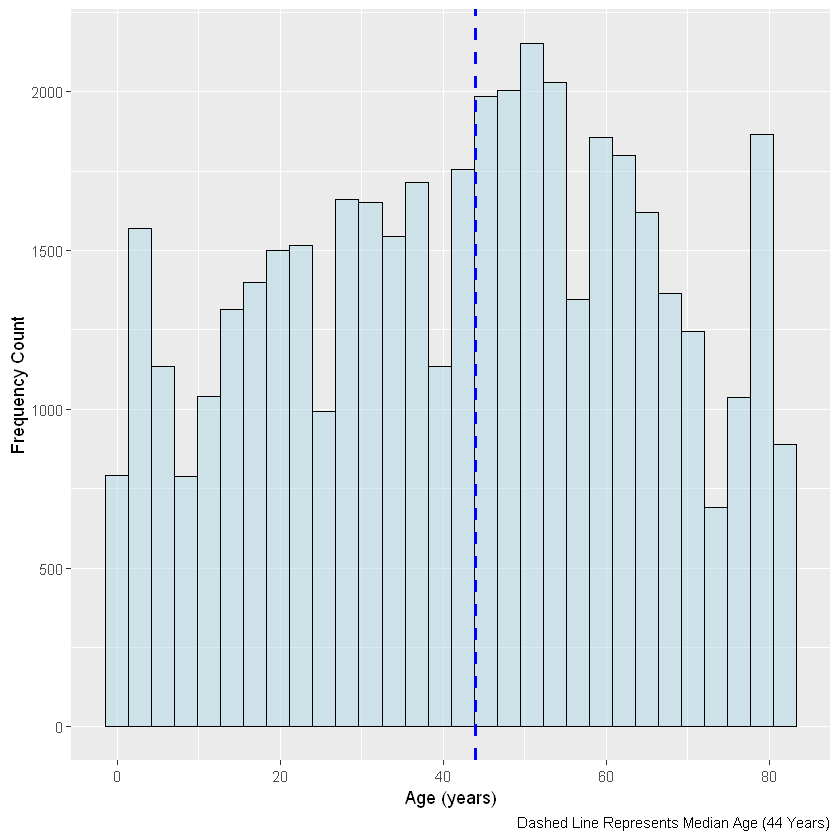

In [24]:
# Create Plot
age_plot <- ggplot(stroke_data, aes(x=age)) +
geom_histogram(alpha = 0.5, position = 'identity', bins=30, color ='black ', fill='light blue') +
labs(x='Age (years)', y='Frequency Count', caption = 'Dashed Line Represents Median Age (44 Years)')

# Display + Median Line
age_plot + geom_vline(aes(xintercept=median(age)),
            color="blue", linetype="dashed", size=1)

There does not appear to be any extreme age values or prominent age clusters. Now lets see if theres a relationship between stroke status and age

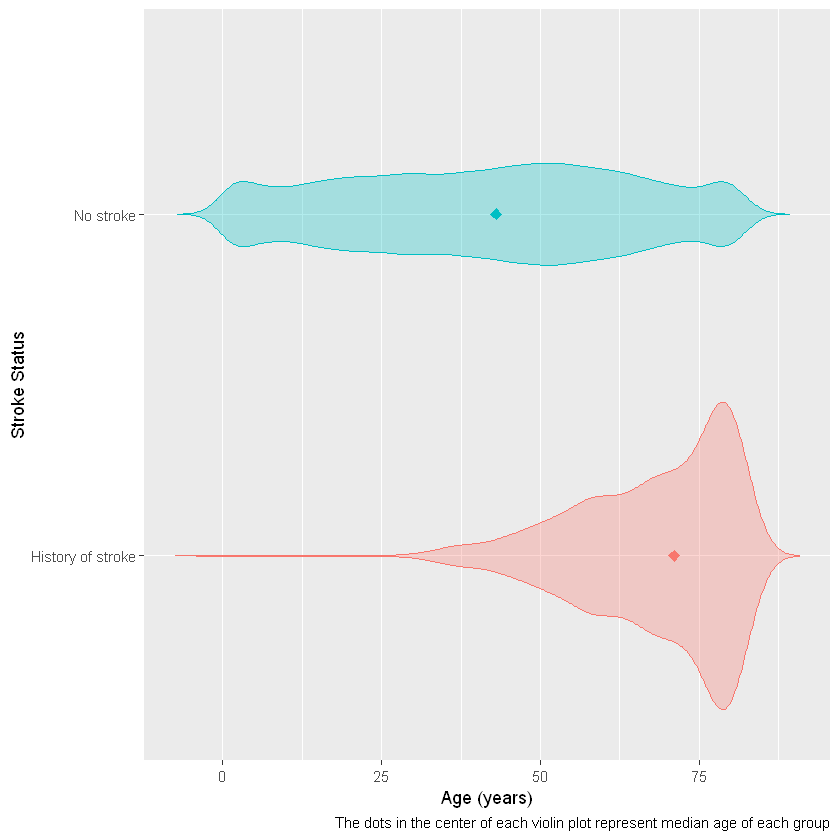

In [25]:
# Create Plot
violin_plot_age <- ggplot(stroke_data, aes(x=stroke, y=age, color = stroke, fill = stroke)) + 
geom_violin(alpha = 0.3, trim = FALSE) + # By default tails are trimmed
stat_summary(fun.y=median, geom="point", shape = 23, size = 2) +
theme(legend.position='none') +
labs(y='Age (years)', x='Stroke Status', 
     caption = 'The dots in the center of each violin plot represent median age of each group') +
coord_flip()

# Display Plot
violin_plot_age

The results are pretty stark. Both median age and distribution of age drastically differs between the stroke and non-stroke group. This make sense since as individuals age, they are predisposed to cardiovascular events such as atherosclerosis or stroke. 

These results indicate age is an excellent candidate variable for our model since age seems to have a large effect on stroke status. This indicates our model could use age to differente between stroke and no stroke. 

## Assessing Categorical Variables

Finally lets look at our remaining variables.

In [26]:
str(stroke_data)

'data.frame':	43400 obs. of  15 variables:
 $ id               : int  30669 30468 16523 56543 46136 32257 52800 41413 15266 28674 ...
 $ gender           : Factor w/ 3 levels "Female","Male",..: 2 2 1 1 2 1 1 1 1 1 ...
 $ age              : num  3 58 8 70 14 47 52 75 32 74 ...
 $ hypertension     : Factor w/ 2 levels "History of hypertension",..: 2 1 2 2 2 2 2 2 2 1 ...
 $ heart_disease    : Factor w/ 2 levels "History of heart disease",..: 2 2 2 2 2 2 2 1 2 2 ...
 $ ever_married     : Factor w/ 2 levels "No","Yes": 1 2 1 2 1 2 2 2 2 2 ...
 $ work_type        : Factor w/ 5 levels "children","Govt_job",..: 1 4 4 4 3 4 4 5 4 5 ...
 $ Residence_type   : Factor w/ 2 levels "Rural","Urban": 1 2 2 1 1 2 2 1 1 2 ...
 $ avg_glucose_level: num  95.1 88 110.9 69 161.3 ...
 $ bmi              : num  18 39.2 17.6 35.9 19.1 50.1 17.7 27 32.3 54.6 ...
 $ smoking_status   : Factor w/ 4 levels "","formerly smoked",..: NA 3 NA 2 NA NA 2 3 4 3 ...
 $ stroke           : Factor w/ 2 levels "History of str

The rest of the variable of interest are categorical. We should be able to observe their effect on stroke well and quickly using stacked bar plots. 

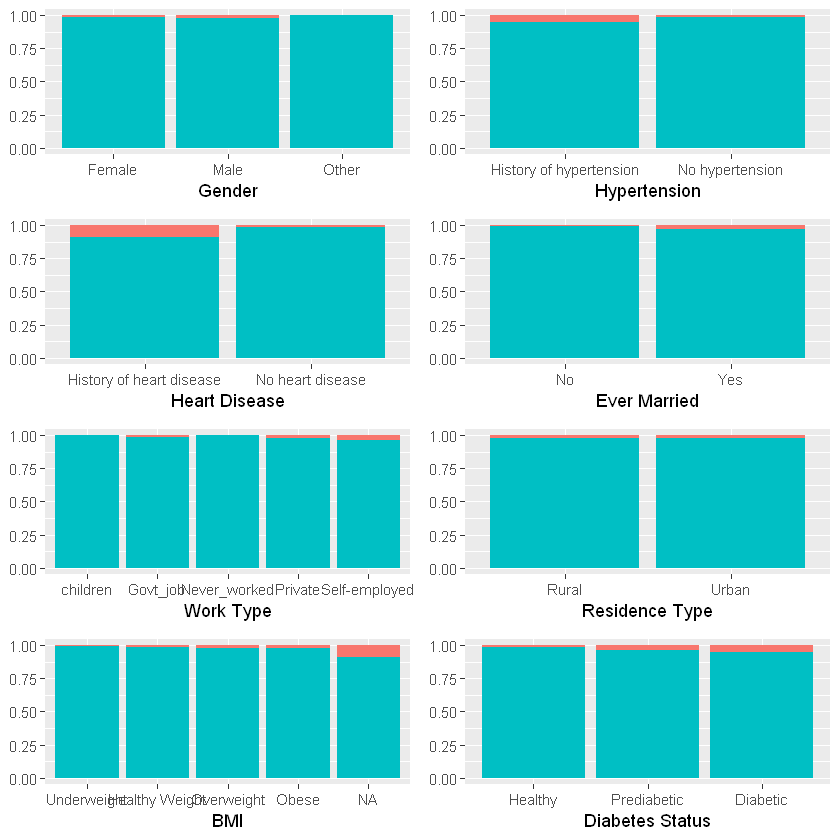

In [27]:
p1 <- ggplot(stroke_data, aes(x=gender, fill = stroke)) + 
geom_bar(position='fill') +
labs(y='Proportion', x='Gender', fill = "Stroke Status") +
theme(legend.position = 'none') + theme(axis.title.y=element_blank())

p2 <- ggplot(stroke_data, aes(x=hypertension, fill = stroke)) + 
geom_bar(position='fill') +
labs(y='Proportion', x='Hypertension', fill = "Stroke Status") +
theme(legend.position = 'none') + theme(axis.title.y=element_blank())

p3 <- ggplot(stroke_data, aes(x=heart_disease, fill = stroke)) + 
geom_bar(position='fill') +
labs(y='Proportion', x='Heart Disease', fill = "Stroke Status") +
theme(legend.position = 'none') + theme(axis.title.y=element_blank())

p4 <- ggplot(stroke_data, aes(x=ever_married, fill = stroke)) + 
geom_bar(position='fill') +
labs(y='Proportion', x='Ever Married', fill = "Stroke Status") +
theme(legend.position = 'none') + theme(axis.title.y=element_blank())

p5 <- ggplot(stroke_data, aes(x=work_type, fill = stroke)) + 
geom_bar(position='fill') +
labs(y='Proportion', x='Work Type', fill = "Stroke Status") +
theme(legend.position = 'none') + theme(axis.title.y=element_blank())

p6 <- ggplot(stroke_data, aes(x=Residence_type, fill = stroke)) + 
geom_bar(position='fill') +
labs(y='Proportion', x='Residence Type', fill = "Stroke Status") +
theme(legend.position = 'none') + theme(axis.title.y=element_blank())

p7 <- ggplot(stroke_data, aes(x=bmi_interp, fill = stroke)) + 
geom_bar(position='fill') +
labs(y='Proportion', x='BMI', fill = "Stroke Status") +
theme(legend.position = 'none') + theme(axis.title.y=element_blank())

p8 <- ggplot(stroke_data, aes(x=diabetic_interp, fill = stroke)) + 
geom_bar(position='fill') +
labs(y='Proportion', x='Diabetes Status', fill = "Stroke Status") +
theme(legend.position = 'none') + theme(axis.title.y=element_blank())

# Arrange plots into grid
plot_grid(p1, p2, p3, p4, p5, p6, p7, p8, ncol = 2)


This plot grid allows us to quickly see how stroke rates differ depending on variable. Based on observation it appears `hypertension`, `heart_disease`, `marriage_status`, `work _type`, `bmi_interp`, and `diabetes_interp` all seem to have an effect on stroke and seem to be promising candidate variables. 

## Logistic Regression

Now lets analyze our predictor variables. Logistic regression is a mathematical model that estimates the probability of a binary outcomes. It is named after the logistic curve which takes the S-shape depicted below.
<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/8/88/Logistic-curve.svg/640px-Logistic-curve.svg.png?1566122052688" alt="Logistic Curve" title="Logistic Curve" />

**Pre-Check:** What is our outcome? What information will a logistic regression model tell use about our outcome?

Our primary outcome is whether the individual had a stroke. The logistic regression model will allow us to see how individuals variables affect whether an individual has a stroke **while controlling for other variables in the model**. For instance, we can see whether being older affects having a stroke while controlling for diabetes, heart disease, etc...

Very useful indeed!

**Follow-Up:** What is statistical significance? What is a generally accepted level of statistical significance in healthcare research?

Statistical Significance can be defined as the chance that the relationship you observed in your data occurred by chance. What does this mean? Lets say our logistic regression model finds that gender has a statistically significant effect on having a stroke. This means that it is more likely that there is indeed a relationship between gender and stroke than chance would suggest. 

The conventional level of significance that is accepted is < 0.05 (this number is referred to as a p-value). This means that there is less than 5% chance that the observed relationship in the data was due to chance alone. The image below display a sample R output.

<img src="https://drchrispook.files.wordpress.com/2017/02/anova-output-from-r1.jpg" align="center" style="margin-bottom: 0.5em; margin-top: 0.5em;">

Lets create our logistic model

In [28]:
# Creating a logistic regression model
mylogit <- glm(stroke ~ gender + age + hypertension + heart_disease + 
               ever_married + work_type + bmi_interp + diabetic_interp,
               data = stroke_data, family = "binomial")
mylogit.sum <- summary(mylogit)
mylogit.sum


Call:
glm(formula = stroke ~ gender + age + hypertension + heart_disease + 
    ever_married + work_type + bmi_interp + diabetic_interp, 
    family = "binomial", data = stroke_data)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-4.0877   0.0472   0.0940   0.1780   0.8038  

Coefficients:
                                Estimate Std. Error z value Pr(>|z|)    
(Intercept)                     7.929768   1.014964   7.813 5.59e-15 ***
genderMale                     -0.080942   0.083369  -0.971    0.332    
genderOther                    10.569517 850.551594   0.012    0.990    
age                            -0.071247   0.003427 -20.792  < 2e-16 ***
hypertensionNo hypertension     0.414153   0.094791   4.369 1.25e-05 ***
heart_diseaseNo heart disease   0.665604   0.103982   6.401 1.54e-10 ***
ever_marriedYes                 0.117509   0.135415   0.868    0.386    
work_typeGovt_job              -0.878079   1.042392  -0.842    0.400    
work_typeNever_worked         

We can see that several of our variables do not have a statistically significant effect. Several of these variables are clinically relevant. This includes while BMI and diabetes status. While there is no statistically significant effect, we know that obesity and diabetes are clinical risk factors for atherosclerotic diseases (one of the underlying etiologies of stroke). For this reason we will be keeping it in our model. 

While statistical significance is important, it is always more important to consider whether our predictor are clinically relevant for the outcome we will be predicting. Remember to alway consider the clinical significance of a variable and not just the statistical significance!

# Building a Prediction Model

**Pre-Check:** So far we haven't done any machine learning yet. What we've done can be considered traditional statistical analyses. What differentiates machine learning from traditional statistical analysis?

In machine learning, data is split into a training and test set. A machine learning model is then trainined on the training set to predict whatever outcome of interest it was designed to predict (in our case we're predicting whether the patient will have a stroke). The models predictive performance is then evaluated using the test set. 

<img src="https://www.sqlservercentral.com/wp-content/uploads/2019/05/Image-2.jpg" align="center" style="margin-bottom: 0.5em; margin-top: 0.5em;">

For our case, we will be using a model called a random forest. A random forest is an algorithm built from numerous smaller algorithm called decision trees. Decision trees are charts which help make a decision or prediction. Each branch represents a possible outcome. The end of branches represent an end result or decision. 

Decision trees are common in medical settings. For instance, below is an algorithm for evaluating febrile seizures. This is an example of a decision tree.

<img src="https://img.grepmed.com/uploads/1105/febrileseizure-management-algorithm-diagnosis-complex-original.png" align="center" style="margin-bottom: 0.5em; margin-top: 0.5em;">

In a random forest algorithm, the results of hundreds (and even thousands) of decision trees are calculated. These results are all combined. 

The rationale is that while a single decision tree can easily be wrong, the pooled result from numerous trees will be more accurate. 

Lets split our data into a training and test set now.

In [29]:
# Splitting the data into training and test set data
# Setting the seed value so we get the same result when we repreat
set.seed(100)

# Determining which rows willbe in the traiing data
training_index <- sample(nrow(stroke_data), 0.8*nrow(stroke_data), replace = FALSE)  

# Create Training Set
training_data <- stroke_data[training_index,]

# Create Test Set
# Don't include stroke column in test set. Prediction will create this column. If you
# include stroke variable, confusion matrix will throw an unequal lengths error
test_data <- stroke_data[-training_index,]

Now lets fit our random forest model to the training and test data. We will then take a look at our models performance using a confusion matrix.

> If you're unsure what a confusion matrix is, please consult section 5.0.1 ('What is a Confusion Matrix')

In [30]:
# Set up the model
model <- (stroke ~ gender + age + hypertension + heart_disease + ever_married + work_type + bmi_interp
         + diabetic_interp)

# Add in NA action to exclude missing 
cat('Training Random Forest, please be patient...\n')
train_rf <- randomForest(formula = model, data = training_data, na.action=na.omit, importance = TRUE)

# Predict
cat('Testing Random Forest, please be patient...\n')
predict_rf <- predict(train_rf, newdata = test_data[,-12], # -12 removes stroke from predictors
                      type = "class")
                      
# Output results
cat('Outputing results...')
confusionMatrix(data = predict_rf, reference = test_data$stroke)

Training Random Forest, please be patient...
Testing Random Forest, please be patient...
Outputing results...

Confusion Matrix and Statistics

                   Reference
Prediction          History of stroke No stroke
  History of stroke                 0         0
  No stroke                       130      8244
                                           
               Accuracy : 0.9845           
                 95% CI : (0.9816, 0.987)  
    No Information Rate : 0.9845           
    P-Value [Acc > NIR] : 0.5233           
                                           
                  Kappa : 0                
                                           
 Mcnemar's Test P-Value : <2e-16           
                                           
            Sensitivity : 0.00000          
            Specificity : 1.00000          
         Pos Pred Value :     NaN          
         Neg Pred Value : 0.98448          
             Prevalence : 0.01552          
         Detection Rate : 0.00000          
   Detection Prevalence : 0.00000          
      Balanced Accuracy : 0.50000          
  

We see that our accuracy is over 90%. However, we did not correctly identify a single stroke. Would a model like this be useful? Absolutely not! All it could do is predict no strokes, the opposite of what we want!

This is one of the weaknesses of random forests. Since the data is very imbalanced (ie. there are tons of negative results and only a few positive results), we can still maintain over 90% accuracy and not predict a single stroke. The algorithm is biased towards outcomes which maximizes its accuracy. 

So what can we do? There are several approaches. We will be implementing a solution known as a weighted random forest. This will punish the algorithm more heavily for misclassifying the data. This is known as cost-sensitive learning. 

In [31]:
# Training new weighted Random Forest model
cat('Training Random Forest, please be patient...\n')
weighted_rf <- randomForest(formula = model, data = training_data, na.action=na.omit, 
                            importance = TRUE, classwt=c(0.5, 0.5))

# Testing new weighted Random Forest model
cat('Testing Random Forest, please be patient...\n')
weighted_predict_rf <- predict(object = weighted_rf, newdata = test_data[-12], type = "class")

# Outputting results
cat('Outputing results...')
confusionMatrix(data = weighted_predict_rf, reference = test_data$stroke)

Training Random Forest, please be patient...
Testing Random Forest, please be patient...
Outputing results...

Confusion Matrix and Statistics

                   Reference
Prediction          History of stroke No stroke
  History of stroke                95      1976
  No stroke                        35      6268
                                           
               Accuracy : 0.7599           
                 95% CI : (0.7506, 0.769)  
    No Information Rate : 0.9845           
    P-Value [Acc > NIR] : 1                
                                           
                  Kappa : 0.0588           
                                           
 Mcnemar's Test P-Value : <2e-16           
                                           
            Sensitivity : 0.73077          
            Specificity : 0.76031          
         Pos Pred Value : 0.04587          
         Neg Pred Value : 0.99445          
             Prevalence : 0.01552          
         Detection Rate : 0.01134          
   Detection Prevalence : 0.24731          
      Balanced Accuracy : 0.74554          
  

Much better! This illustrates why accuracy can be a misleading metric for machine learning models. So if accuracy is not a great measure, what is? Continue on to find out!

### What Is A Confusion Matrix

A confusion matrix is a 2x2 table which computes 4 different combinations of predicted vs. actual values. The combinations are True Positive (TP), True Negative (TN), False Positive (FP), and False Negative (FN)

<img src="https://miro.medium.com/max/320/1*Z54JgbS4DUwWSknhDCvNTQ.png" align="center" style="margin-bottom: 0.5em; margin-top: 0.5em;">

These 4 interpretations can be combined to generate many useful metrics. For our purpose there are three we will focus on. The first is accuracy: 

\[\large (TP + TN)/Total\]

Accuracy allows us to measure how often our model predicted correctly. The second metric is sensitivity:

\[\large TP / (TP + FN)\]

Sensitivity asks the question, that when our outcome is actually positive (ie. in our case when our patient is actually high-risk) how often will the model predict positively (ie. how often will the model then predict the patient to be high-risk). The final metric is specificity:

\[\large FP / (FP + TN)\]

Specificity asks the question, that when the outcome is actually negative (ie. in our case when our patient is actually low-risk) how often will the model predict negatively (ie. how often will the model then predict the patient to be low-risk). 




## Evaluating our Model

We will be evaluating our model using a receiver operating curve (ROC) and the area under the curve (AUC) value. 

> If you're unsure what a ROC or AUC value is, please consult section 5.1.1 ('Understanding ROC Curves and AUC Values')

Setting levels: control = History of stroke, case = No stroke
Setting direction: controls > cases


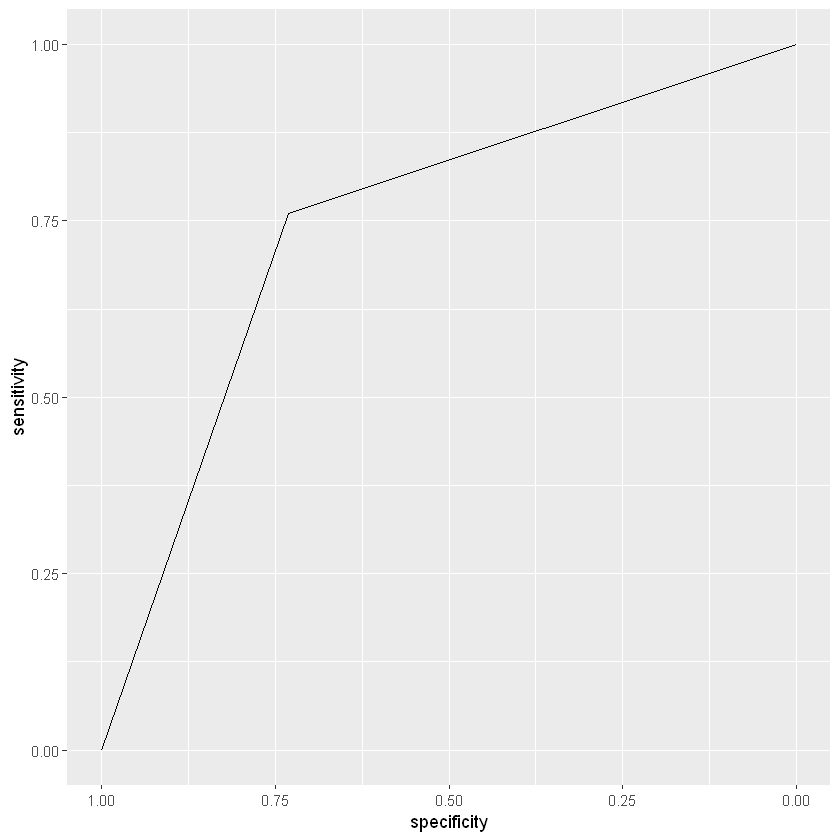

In [32]:
# Create a ROC curve
ROC <- roc(response = test_data$stroke, predictor = factor(weighted_predict_rf, 
                                                           ordered = TRUE, 
                                                           levels = c('No stroke', 'History of stroke')))

# Plot ROC with ggplot2
plot_ROC <- ggroc(ROC)
plot_ROC

In [33]:
# Calculate the area under the curve (AUC)
cat('AUC:', round(auc(ROC), 2))

AUC: 0.75

The closer to the top left corner our ROC curve is the better. The higher our AUC value is the better. These metrics provide useful measures when tuning our model. They are also better overall measures than accuracy alone. We can compare different models using these two metrics. 

### Understanding ROC Curves and AUC Values

An ROC plots sensitivity (probability of predicting a real psoitive will be positive) against 1-specificity (the probability of predicting a real negative will be a positive). A model with a 50-50 change of making a correct decision will have a ROC curve which is just a diagonal line. A model with a curve that hugs the top left corner is a perfect model. The area under a curve is a measure of magnitude of the ROC curve. The closer the ROC curve is to the top left corner, the higher the AUC value is. The higher the AUC value is, the better. 

<img src="https://miro.medium.com/max/406/1*pk05QGzoWhCgRiiFbz-oKQ.png" style="float: center; width: 34%; margin-bottom: 0.5em;">

## Explaining the Model

An important part of any model is being able to explain it. We will be measuring variable importance using a measure called a **Gini Score**. The mathematics of the **Gini Score** are beyond the scope of the case. For our model, the higher the decrease in gini score, the more important that variable is for our model's performance. 

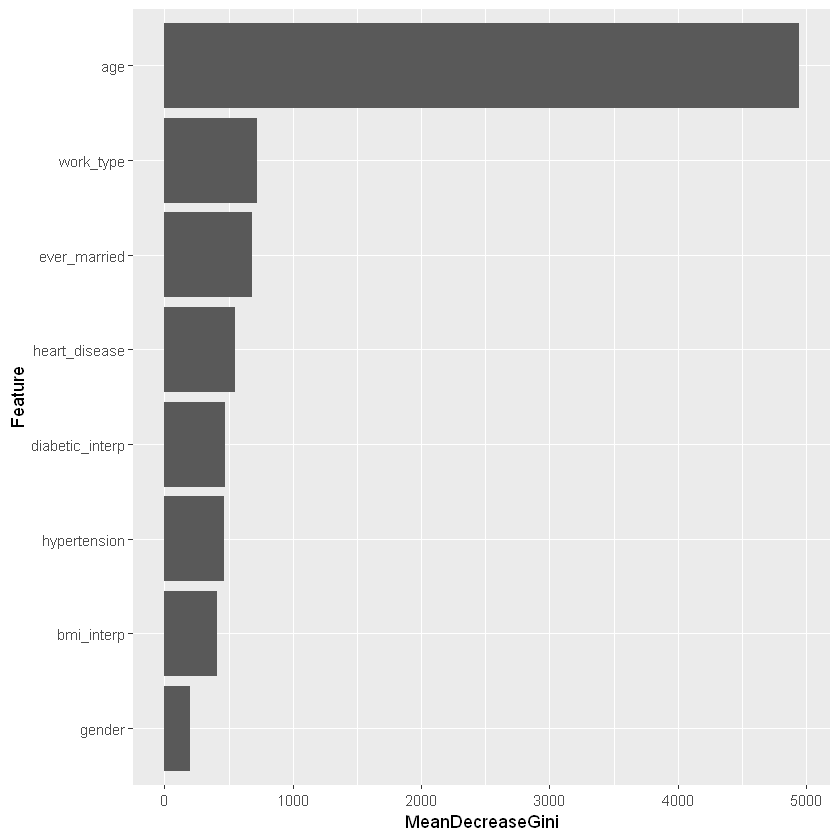

In [34]:
# Create Dataframe
imp <- cbind.data.frame(Feature=rownames(weighted_rf$importance), weighted_rf$importance)

# Create Plot
gini <- ggplot(imp, aes(x=reorder(Feature, MeanDecreaseGini), y=MeanDecreaseGini))

# Display Plot
gini + geom_bar(stat = 'identity') + xlab('Feature') + coord_flip()

From our model we can see that age is by far the most important variable for performance. Surprisingly we can see work type and marriage status are important variables as well. In fact, they are even more important than some of our traditional clinical variables! This doesn't necessarily mean being married will definitely lead to a stroke. This just indicate that these variables are important for our models performance. Regardless, this reveals non-traditional variables worth future investigation. 

Congratulations! You've reached the end of the case! This case provided just one example of how analytics and healthcare can be combined to solve clinical problems. I hope your curiosity has been piqued. There much more to learn and much more you can explore in this field!